In [1]:
#
# CS 412 - Group Project
#

#
# Author: Shiladitya
#

#
# Importing Dataset: Predict Students' Dropout and Academic Success
# Link: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

#
# Dataset Description: A dataset created from a higher education institution (acquired from several disjoint databases)
# related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism,
# management, social service, and technologies. The dataset includes information known at the time of student enrollment
# (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first
# and second semesters. The data is used to build classification models to predict students' dropout and academic sucess.
# The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.
#

# Dataset Citation: Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict Students' Dropout and Academic Success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

#
# N(students) instances = 4424, Num_features = 36
#


# Importing...

# !pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)



{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [2]:
# Libraries:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


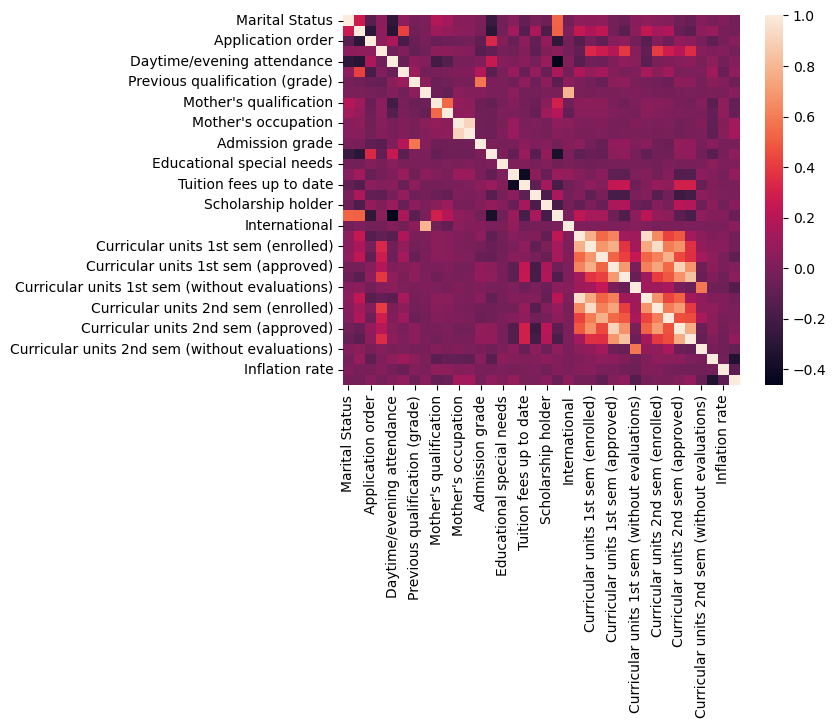

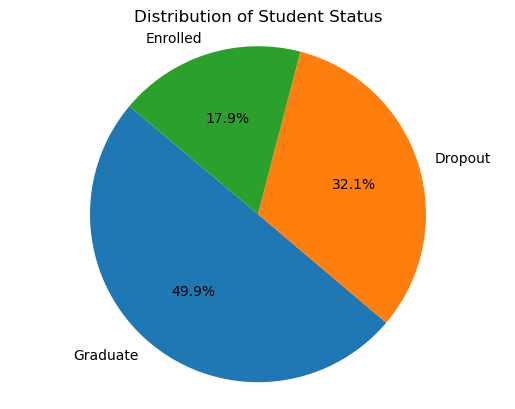

In [3]:
# Draw Plots

sns.heatmap(X.corr())
plt.show()

plt.pie(y['Target'].value_counts(), labels=y['Target'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Student Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [4]:
# Split into train and test

y = y['Target'].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Logistic Regression
logistic_model = LogisticRegression(max_iter = 10000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))


Logistic Regression Accuracy: 0.7502824858757062
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Dropout       0.82      0.77      0.79       316
    Enrolled       0.44      0.25      0.32       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.75       885
   macro avg       0.67      0.65      0.65       885
weighted avg       0.73      0.75      0.73       885



In [5]:
# Support Vector Machine
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("\nSupport Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_predictions))


Support Vector Machine Accuracy: 0.752542372881356
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.77      0.79       316
    Enrolled       0.50      0.23      0.31       151
    Graduate       0.75      0.93      0.83       418

    accuracy                           0.75       885
   macro avg       0.69      0.64      0.64       885
weighted avg       0.73      0.75      0.73       885



In [6]:
# K-Nearest Neighbors

X = np.asarray(X)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

for i in range(1, 10, 2):
    knn_model = KNeighborsClassifier(n_neighbors = i) # n_neighbours can be adjusted
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)

    print("\nK-Nearest Neighbors K-value: ", i)
    print("K-Nearest Neighbors Accuracy:", knn_accuracy)
    print("K-Nearest Neighbors Classification Report:")
    print(classification_report(y_test, knn_predictions))


K-Nearest Neighbors K-value:  1
K-Nearest Neighbors Accuracy: 0.5649717514124294
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

     Dropout       0.61      0.48      0.54       316
    Enrolled       0.28      0.31      0.30       151
    Graduate       0.64      0.72      0.68       418

    accuracy                           0.56       885
   macro avg       0.51      0.50      0.50       885
weighted avg       0.57      0.56      0.56       885


K-Nearest Neighbors K-value:  3
K-Nearest Neighbors Accuracy: 0.5988700564971752
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

     Dropout       0.62      0.56      0.59       316
    Enrolled       0.31      0.21      0.25       151
    Graduate       0.65      0.77      0.70       418

    accuracy                           0.60       885
   macro avg       0.53      0.51      0.51       885
weighted avg       0.58      0.60      0.58